In [6]:
import numpy as np
import pandas as pd

path = "/Users/laurapineda/STAT520/NewDatasetRCs.csv"

cols_list = ["SLFCHG01", 
             "SLFCHG02", 
             "SLFCHG03", 
             "SLFCHG04",
             "CSSRAT01",
             "CSSRAT07", 
             "SUCCESS4", 
             "SATIS13", 
             "SATIS01", 
             "SATIS02", 
             "SATIS07", 
             "SATIS15", 
             "SATIS25", 
             "CSSRAT16", 
             "GENACT05", 
             "COLACT19", 
             "COLACT17", 
             "FATHEDUC", 
             "MOTHEDUC",
             "RACEGROUP", 
             "UndrRepStud_RC", 
             "FINCON_RC", 
             "FirstGen_RC", 
             "INCOME", 
             "HSGPA", 
             "CITIZEN", 
             "PLANLIVE", 
             "DSstud_RC", 
             "SIFRAT01", 
             "SIFRAT07", 
             "SIFMAJA", 
             "CSSHPW01", 
             "CSSHPW02", 
             "CSSHPW05",
             "CSSHPW08"]

df = pd.read_csv(path, usecols = cols_list, low_memory = False)

print(df.head())

df.shape[1]


  CITIZEN  COLACT17  COLACT19 CSSHPW01 CSSHPW02 CSSHPW05 CSSHPW08 CSSRAT01  \
0       2         1         1        5        6        4        1        4   
1       1         2         1        6        6        5        4        4   
2       1         2         1        5        6        1        3        3   
3       1         1         1        4        6        4        3        4   
4       1         1         1        5        7        2        3        5   

  CSSRAT07 CSSRAT16  ... SLFCHG01 SLFCHG02 SLFCHG03 SLFCHG04 SUCCESS4  \
0        4        5  ...        4        4        5        4        3   
1        5        5  ...        4        4        4        4        2   
2        2        2  ...        5        4        5        4        1   
3        2        3  ...        4        4        4        4        2   
4        5        4  ...        4        4        4        4        3   

  RACEGROUP DSstud_RC FirstGen_RC UndrRepStud_RC FINCON_RC  
0         3         1          

35

#### Cleaning data: 

In [10]:
dat = pd.read_csv("/Users/laurapineda/STAT520/df_subset.csv")

dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SLFCHG01        5000 non-null   object
 1   SLFCHG02        5000 non-null   object
 2   SLFCHG03        5000 non-null   object
 3   SLFCHG04        5000 non-null   object
 4   CSSRAT01        5000 non-null   object
 5   CSSRAT07        5000 non-null   object
 6   SUCCESS4        5000 non-null   object
 7   SATIS13         5000 non-null   object
 8   SATIS01         5000 non-null   object
 9   SATIS02         5000 non-null   object
 10  SATIS07         5000 non-null   object
 11  SATIS15         5000 non-null   object
 12  SATIS25         5000 non-null   object
 13  CSSRAT16        5000 non-null   object
 14  CSSRAT07.1      5000 non-null   object
 15  GENACT05        5000 non-null   object
 16  COLACT19        5000 non-null   int64 
 17  COLACT17        5000 non-null   int64 
 18  FATHEDUC

In [37]:
# We will replace any empty spots with NAN
dat = dat.replace(r'^\s*$', np.nan, regex=True)

# We count all the missings
missing_counts = dat.isnull().sum()

print(missing_counts)

SLFCHG01           63
SLFCHG02           69
SLFCHG03           70
SLFCHG04           70
CSSRAT01           99
CSSRAT07          104
SUCCESS4           86
SATIS13            46
SATIS01            41
SATIS02            44
SATIS07            51
SATIS15            51
SATIS25            51
CSSRAT16          101
CSSRAT07.1        104
GENACT05           64
COLACT19            0
COLACT17            0
FATHEDUC          121
MOTHEDUC           56
RACEGROUP         249
UndrRepStud_RC      0
FINCON_RC         153
FirstGen_RC       137
INCOME            484
HSGPA              59
CITIZEN            45
PLANLIVE            9
DSstud_RC           0
SIFRAT01           21
SIFRAT07           25
SIFMAJA           231
CSSHPW01           56
CSSHPW02           74
CSSHPW03           75
CSSHPW05           70
CSSHPW08           83
dtype: int64


In [35]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

def littles_mcar_test(df):
    # Create a binary matrix indicating missingness
    missing_matrix = df.isnull().astype(int)

    if missing_matrix.sum(axis=1).nunique() > 1:
        print("Missingness pattern detected. Further analysis needed.")
    else:
        print("No obvious missingness pattern based on simple row sums.")

littles_mcar_test(dat)

Missingness pattern detected. Further analysis needed.


In [45]:
# !pip install missingno

In [69]:
subset = dat.loc[:, "CITIZEN":]
subset.head()

,CITIZEN,PLANLIVE,DSstud_RC,SIFRAT01,SIFRAT07,SIFMAJA,CSSHPW01,CSSHPW02,CSSHPW03,CSSHPW05,CSSHPW08
0,2.0,1.0,1,5.0,4.0,7.0,5.0,6.0,6.0,4.0,1.0
1,1.0,3.0,1,4.0,5.0,5.0,6.0,6.0,8.0,5.0,4.0
2,1.0,3.0,1,3.0,4.0,3.0,5.0,6.0,5.0,1.0,3.0
3,1.0,3.0,1,4.0,3.0,3.0,4.0,6.0,6.0,4.0,3.0
4,1.0,3.0,1,5.0,5.0,7.829959,5.0,7.0,8.0,2.0,3.0


In [73]:
dat.isnull().sum()

SLFCHG01           63
SLFCHG02           69
SLFCHG03           70
SLFCHG04           70
CSSRAT01           99
CSSRAT07          104
SUCCESS4           86
SATIS13            46
SATIS01            41
SATIS02            44
SATIS07            51
SATIS15            51
SATIS25            51
CSSRAT16          101
CSSRAT07.1        104
GENACT05           64
COLACT19            0
COLACT17            0
FATHEDUC          121
MOTHEDUC           56
RACEGROUP         249
UndrRepStud_RC      0
FINCON_RC         153
FirstGen_RC       137
INCOME            484
HSGPA              59
CITIZEN             0
PLANLIVE            0
DSstud_RC           0
SIFRAT01            0
SIFRAT07            0
SIFMAJA             0
CSSHPW01            0
CSSHPW02            0
CSSHPW03            0
CSSHPW05            0
CSSHPW08            0
dtype: int64

No obvious missingness pattern based on simple row sums.


<Axes: >

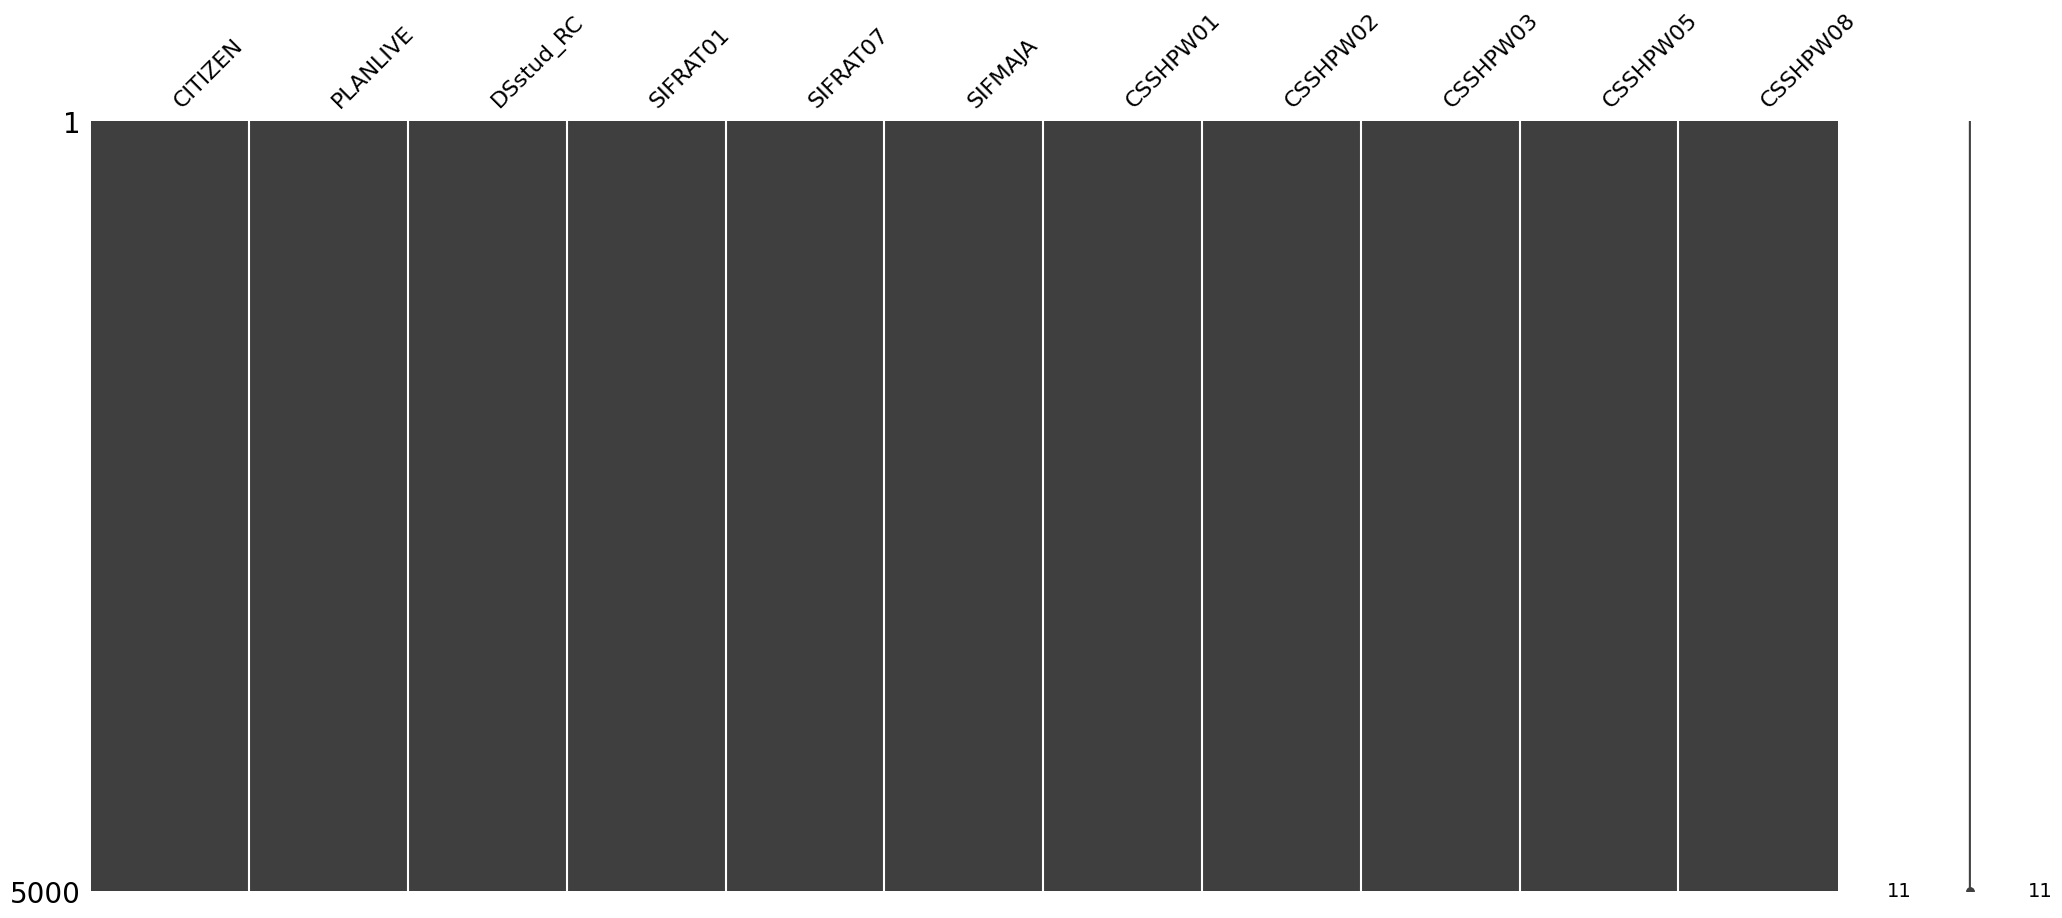

In [61]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

def littles_mcar_test(df):
    # Create a binary matrix indicating missingness
    missing_matrix = df.isnull().astype(int)

    if missing_matrix.sum(axis=1).nunique() > 1:
        print("Missingness pattern detected. Further analysis needed.")
    else:
        print("No obvious missingness pattern based on simple row sums.")

littles_mcar_test(subset)

import missingno as msno
msno.matrix(subset)

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

imputer = IterativeImputer(max_iter=20, random_state=0)
subset_imputed = pd.DataFrame(imputer.fit_transform(subset), columns=subset.columns)

dat.loc[:, "CITIZEN":] = subset_imputed

subset_imputed.isnull().sum()

CITIZEN      0
PLANLIVE     0
DSstud_RC    0
SIFRAT01     0
SIFRAT07     0
SIFMAJA      0
CSSHPW01     0
CSSHPW02     0
CSSHPW03     0
CSSHPW05     0
CSSHPW08     0
dtype: int64

In [59]:
subset_imputed.head(5)

,CITIZEN,PLANLIVE,DSstud_RC,SIFRAT01,SIFRAT07,SIFMAJA,CSSHPW01,CSSHPW02,CSSHPW03,CSSHPW05,CSSHPW08
0,2.0,1.0,1.0,5.0,4.0,7.000000,5.0,6.0,6.0,4.0,1.0
1,1.0,3.0,1.0,4.0,5.0,5.000000,6.0,6.0,8.0,5.0,4.0
2,1.0,3.0,1.0,3.0,4.0,3.000000,5.0,6.0,5.0,1.0,3.0
3,1.0,3.0,1.0,4.0,3.0,3.000000,4.0,6.0,6.0,4.0,3.0
4,1.0,3.0,1.0,5.0,5.0,7.829959,5.0,7.0,8.0,2.0,3.0


## STARTING AGAIN

In [77]:
df_sub = pd.read_csv("/Users/laurapineda/STAT520/df_subset.csv")
df_sub.head()

,SLFCHG01,SLFCHG02,SLFCHG03,SLFCHG04,CSSRAT01,CSSRAT07,SUCCESS4,SATIS13,SATIS01,SATIS02,...,PLANLIVE,DSstud_RC,SIFRAT01,SIFRAT07,SIFMAJA,CSSHPW01,CSSHPW02,CSSHPW03,CSSHPW05,CSSHPW08
0,4,4,5,4,4,4,3,1,5,2,...,1,1,5,4,7,5,6,6,4,1
1,4,4,4,4,4,5,2,4,4,4,...,3,1,4,5,5,6,6,8,5,4
2,5,4,5,4,3,2,1,3,4,5,...,3,1,3,4,3,5,6,5,1,3
3,4,4,4,4,4,2,2,4,4,4,...,3,1,4,3,3,4,6,6,4,3
4,4,4,4,4,5,5,3,5,3,4,...,3,1,5,5,,5,7,8,2,3


In [79]:
# Let's analyze the last 10 variables
df_last = df_sub.loc[:, "CITIZEN":]
df_last.head()

,CITIZEN,PLANLIVE,DSstud_RC,SIFRAT01,SIFRAT07,SIFMAJA,CSSHPW01,CSSHPW02,CSSHPW03,CSSHPW05,CSSHPW08
0,2,1,1,5,4,7,5,6,6,4,1
1,1,3,1,4,5,5,6,6,8,5,4
2,1,3,1,3,4,3,5,6,5,1,3
3,1,3,1,4,3,3,4,6,6,4,3
4,1,3,1,5,5,,5,7,8,2,3


In [82]:
df_last.isnull().sum()

CITIZEN      0
PLANLIVE     0
DSstud_RC    0
SIFRAT01     0
SIFRAT07     0
SIFMAJA      0
CSSHPW01     0
CSSHPW02     0
CSSHPW03     0
CSSHPW05     0
CSSHPW08     0
dtype: int64

## Starting again 

In [101]:
# We read a copy of the original csv file called df_sub.csv
dat1 = pd.read_csv("/Users/laurapineda/STAT520/df_sub.csv")

# I was assigned the last few variables so I subset the whole dataset to only focus on those
sub_dat1 = dat1.loc[ : , "CITIZEN" : ]
sub_dat1.head(20)


,CITIZEN,PLANLIVE,DSstud_RC,SIFRAT01,SIFRAT07,SIFMAJA,CSSHPW01,CSSHPW02,CSSHPW03,CSSHPW05,CSSHPW08
0,2,1,1,5,4,7,5,6,6,4,1
1,1,3,1,4,5,5,6,6,8,5,4
2,1,3,1,3,4,3,5,6,5,1,3
3,1,3,1,4,3,3,4,6,6,4,3
4,1,3,1,5,5,,5,7,8,2,3
5,2,3,1,5,5,3,4,6,8,7,2
6,1,3,1,3,2,3,7,6,3,2,1
7,2,3,1,5,3,13,8,5,6,3,3
8,2,1,1,4,5,7,6,6,5,3,4
9,2,3,1,4,5,3,4,6,7,7,2


In [115]:
# First, let's make sure any spaces are seen as missing (NAN)
sub_dat1 = sub_dat1.replace(r'^\s*$', np.nan, regex=True)
sub_dat1.head(20)


/var/folders/18/7qxvnjw16nqg9m9svs241jgc0000gn/T/ipykernel_66230/2234838005.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sub_dat1 = sub_dat1.replace(r'^\s*$', np.nan, regex=True)


,CITIZEN,PLANLIVE,DSstud_RC,SIFRAT01,SIFRAT07,SIFMAJA,CSSHPW01,CSSHPW02,CSSHPW03,CSSHPW05,CSSHPW08
0,2.0,1.0,1,5.0,4.0,7.000000,5.0,6.0,6.0,4.0,1.0
1,1.0,3.0,1,4.0,5.0,5.000000,6.0,6.0,8.0,5.0,4.0
2,1.0,3.0,1,3.0,4.0,3.000000,5.0,6.0,5.0,1.0,3.0
3,1.0,3.0,1,4.0,3.0,3.000000,4.0,6.0,6.0,4.0,3.0
4,1.0,3.0,1,5.0,5.0,7.829959,5.0,7.0,8.0,2.0,3.0
5,2.0,3.0,1,5.0,5.0,3.000000,4.0,6.0,8.0,7.0,2.0
6,1.0,3.0,1,3.0,2.0,3.000000,7.0,6.0,3.0,2.0,1.0
7,2.0,3.0,1,5.0,3.0,13.000000,8.0,5.0,6.0,3.0,3.0
8,2.0,1.0,1,4.0,5.0,7.000000,6.0,6.0,5.0,3.0,4.0
9,2.0,3.0,1,4.0,5.0,3.000000,4.0,6.0,7.0,7.0,2.0


In [113]:
# Now, we count the missing data
missing_counts = sub_dat1.isnull().sum()
print(missing_counts)

CITIZEN      0
PLANLIVE     0
DSstud_RC    0
SIFRAT01     0
SIFRAT07     0
SIFMAJA      0
CSSHPW01     0
CSSHPW02     0
CSSHPW03     0
CSSHPW05     0
CSSHPW08     0
dtype: int64


In [105]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np


def littles_mcar_test(df):
    # Create a binary matrix indicating missingness
    missing_matrix = df.isnull().astype(int)

    if missing_matrix.sum(axis=1).nunique() > 1:
        print("Missingness pattern detected. Further analysis needed.")
    else:
        print("No obvious missingness pattern based on simple row sums.")

littles_mcar_test(sub_dat1)
#import missingno as msno
#msno.matrix(subset)

Missingness pattern detected. Further analysis needed.


In [109]:
# Since we don't have MCAR, we can impute based on a multiple linear regression. 
# This will help predict the missing values and since the highest missing value (in the whole dataset) is less than 2%,
# this won't skew the data. 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

impute_vals = IterativeImputer(max_iter = 20, random_state = 0)
subset_imputed = pd.DataFrame(impute_vals.fit_transform(sub_dat1), columns=sub_dat1.columns)

subset_imputed.isnull().sum()

CITIZEN      0
PLANLIVE     0
DSstud_RC    0
SIFRAT01     0
SIFRAT07     0
SIFMAJA      0
CSSHPW01     0
CSSHPW02     0
CSSHPW03     0
CSSHPW05     0
CSSHPW08     0
dtype: int64

In [111]:
# We finish by changing this data into a new dataset as to not change our original data just in case and then we'll create a new csv

dat1.loc[:, "CITIZEN":] = subset_imputed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CITIZEN    5000 non-null   object
 1   PLANLIVE   5000 non-null   object
 2   DSstud_RC  5000 non-null   int64 
 3   SIFRAT01   5000 non-null   object
 4   SIFRAT07   5000 non-null   object
 5   SIFMAJA    5000 non-null   object
 6   CSSHPW01   5000 non-null   object
 7   CSSHPW02   5000 non-null   object
 8   CSSHPW03   5000 non-null   object
 9   CSSHPW05   5000 non-null   object
 10  CSSHPW08   5000 non-null   object
dtypes: int64(1), object(10)
memory usage: 429.8+ KB


In [ ]:
dat1 = pd.DataFrame(data)

dat1.to_csv('lastvars_cleaned.csv', index=False)

